# Preliminary analysis


✓ Saved plot to 'tokenizer_comparison.png'


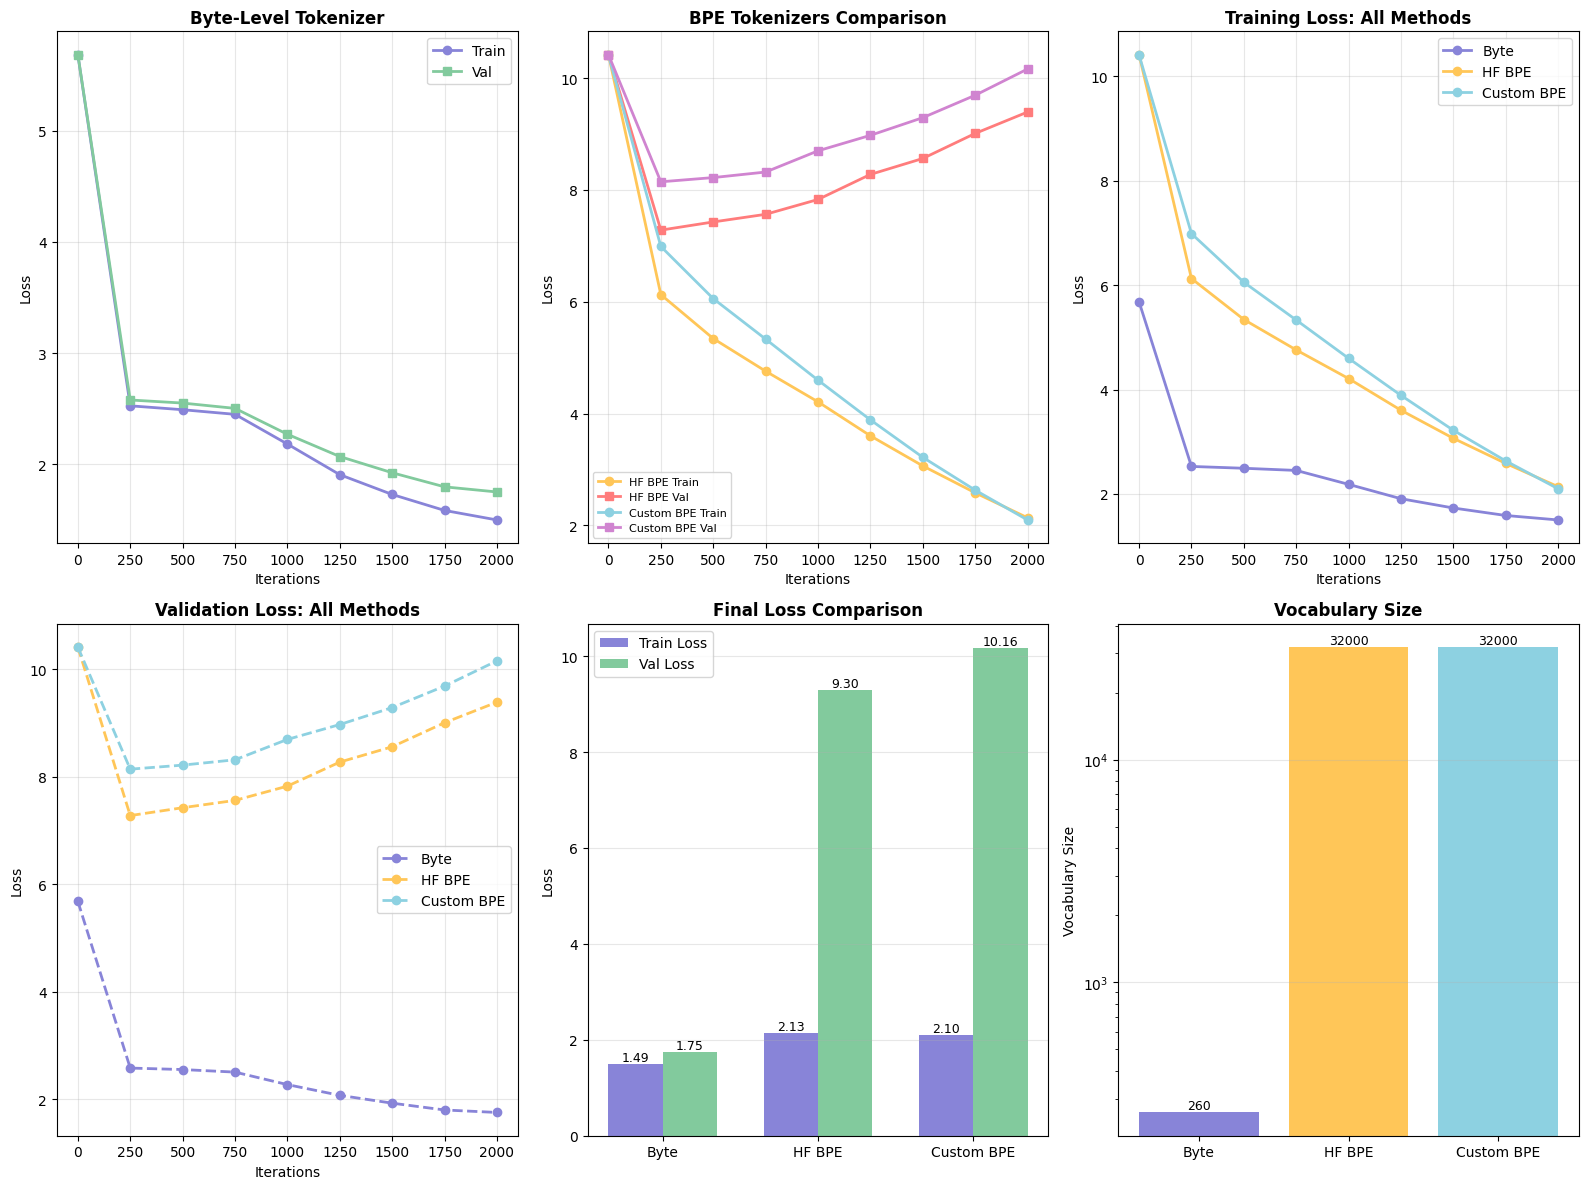


TOKENIZER COMPARISON SUMMARY

BYTE
----------------------------------------------------------------------
  Vocabulary Size:  260
  Final Train Loss: 1.4942
  Final Val Loss:   1.7499
  Overfitting Gap:  0.2556
  Train Improvement: 4.1873 (73.7%)
  Val Improvement:   3.9328 (69.2%)

HF_BPE
----------------------------------------------------------------------
  Vocabulary Size:  32000
  Final Train Loss: 2.1333
  Final Val Loss:   9.3023
  Overfitting Gap:  7.1690
  Train Improvement: 8.2851 (79.5%)
  Val Improvement:   1.1147 (10.7%)

CUSTOM_BPE
----------------------------------------------------------------------
  Vocabulary Size:  32000
  Final Train Loss: 2.1009
  Final Val Loss:   10.1647
  Overfitting Gap:  8.0639
  Train Improvement: 8.3113 (79.8%)
  Val Improvement:   0.2522 (2.4%)

KEY FINDINGS
✓ Byte-level achieves best generalization (1.75 val loss)
✓ BPE methods show severe overfitting (9-10 val loss)
✓ Byte-level uses 100x smaller vocabulary (260 vs 32,000)
✓ Despite sm

In [ ]:
import json
import matplotlib.pyplot as plt
import numpy as np

# Results data
data = {
    "byte": {
        "mode": "byte",
        "vocab_size": 260,
        "train_losses": [
            5.681477832794189,
            2.526719506581624,
            2.4917565822601317,
            2.450240381558736,
            2.1834145704905192,
            1.908097000916799,
            1.7302823583285014,
            1.5867629448572795,
            1.5011649171511332
        ],
        "val_losses": [
            5.682654730478922,
            2.579140631357829,
            2.5514808893203735,
            2.5038220087687173,
            2.2712380091349282,
            2.071178225676219,
            1.92544135649999,
            1.7988006711006164,
            1.752622167269389
        ],
        "final_train_loss": 1.4942251483599345,
        "final_val_loss": 1.749852176507314,
    },
    "hf_bpe": {
        "mode": "hf_bpe",
        "vocab_size": 32000,
        "train_losses": [
            10.418362808227538,
            6.127275800704956,
            5.3421458085378015,
            4.758996391296387,
            4.210698541005453,
            3.603099513053894,
            3.065522249539693,
            2.5848241647084556,
            2.1381685098012286
        ],
        "val_losses": [
            10.417021973927815,
            7.280117543538411,
            7.426471424102783,
            7.562869342168172,
            7.828176275889079,
            8.275982173283895,
            8.561050001780192,
            9.00886090596517,
            9.391433938344319
        ],
        "final_train_loss": 2.1333109021186827,
        "final_val_loss": 9.3022967338562,
    },
    "custom_bpe": {
        "mode": "custom_bpe",
        "vocab_size": 32000,
        "train_losses": [
            10.412134011586508,
            6.988174470265706,
            6.05606369972229,
            5.332341734568278,
            4.598382059733073,
            3.8885766744613646,
            3.219403545061747,
            2.632081985473633,
            2.0987817883491515
        ],
        "val_losses": [
            10.416911284128824,
            8.144295374552408,
            8.219626744588217,
            8.318769963582357,
            8.698041693369548,
            8.974939028422037,
            9.290701421101888,
            9.691332403818766,
            10.160538832346598
        ],
        "final_train_loss": 2.1008732239405314,
        "final_val_loss": 10.164742310841879,
    }
}

# Create figure with subplots
fig = plt.figure(figsize=(16, 12))

# Calculate iterations (2000 max_iters across 9 checkpoints)
max_iters = 2000
num_checkpoints = len(data['byte']['train_losses'])
iterations = np.linspace(0, max_iters, num_checkpoints)

# 1. Byte-Level Training Curves
ax1 = plt.subplot(2, 3, 1)
ax1.plot(iterations, data['byte']['train_losses'], marker='o', label='Train', linewidth=2, color='#8884d8')
ax1.plot(iterations, data['byte']['val_losses'], marker='s', label='Val', linewidth=2, color='#82ca9d')
ax1.set_xlabel('Iterations')
ax1.set_ylabel('Loss')
ax1.set_title('Byte-Level Tokenizer', fontsize=12, fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)

# 2. BPE Training Curves
ax2 = plt.subplot(2, 3, 2)
ax2.plot(iterations, data['hf_bpe']['train_losses'], marker='o', label='HF BPE Train', linewidth=2, color='#ffc658')
ax2.plot(iterations, data['hf_bpe']['val_losses'], marker='s', label='HF BPE Val', linewidth=2, color='#ff7c7c')
ax2.plot(iterations, data['custom_bpe']['train_losses'], marker='o', label='Custom BPE Train', linewidth=2, color='#8dd1e1')
ax2.plot(iterations, data['custom_bpe']['val_losses'], marker='s', label='Custom BPE Val', linewidth=2, color='#d084d0')
ax2.set_xlabel('Iterations')
ax2.set_ylabel('Loss')
ax2.set_title('BPE Tokenizers Comparison', fontsize=12, fontweight='bold')
ax2.legend(fontsize=8)
ax2.grid(True, alpha=0.3)

# 3. Training Loss: All Methods
ax3 = plt.subplot(2, 3, 3)
ax3.plot(iterations, data['byte']['train_losses'], marker='o', label='Byte', linewidth=2, color='#8884d8')
ax3.plot(iterations, data['hf_bpe']['train_losses'], marker='o', label='HF BPE', linewidth=2, color='#ffc658')
ax3.plot(iterations, data['custom_bpe']['train_losses'], marker='o', label='Custom BPE', linewidth=2, color='#8dd1e1')
ax3.set_xlabel('Iterations')
ax3.set_ylabel('Loss')
ax3.set_title('Training Loss: All Methods', fontsize=12, fontweight='bold')
ax3.legend()
ax3.grid(True, alpha=0.3)

# 4. Validation Loss: All Methods
ax4 = plt.subplot(2, 3, 4)
ax4.plot(iterations, data['byte']['val_losses'], marker='o', linestyle='--', label='Byte', linewidth=2, color='#8884d8')
ax4.plot(iterations, data['hf_bpe']['val_losses'], marker='o', linestyle='--', label='HF BPE', linewidth=2, color='#ffc658')
ax4.plot(iterations, data['custom_bpe']['val_losses'], marker='o', linestyle='--', label='Custom BPE', linewidth=2, color='#8dd1e1')
ax4.set_xlabel('Iterations')
ax4.set_ylabel('Loss')
ax4.set_title('Validation Loss: All Methods', fontsize=12, fontweight='bold')
ax4.legend()
ax4.grid(True, alpha=0.3)

# 5. Final Loss Comparison
ax5 = plt.subplot(2, 3, 5)
methods = ['Byte', 'HF BPE', 'Custom BPE']
train_losses = [data['byte']['final_train_loss'], data['hf_bpe']['final_train_loss'], data['custom_bpe']['final_train_loss']]
val_losses = [data['byte']['final_val_loss'], data['hf_bpe']['final_val_loss'], data['custom_bpe']['final_val_loss']]

x = np.arange(len(methods))
width = 0.35

bars1 = ax5.bar(x - width/2, train_losses, width, label='Train Loss', color='#8884d8')
bars2 = ax5.bar(x + width/2, val_losses, width, label='Val Loss', color='#82ca9d')

ax5.set_ylabel('Loss')
ax5.set_title('Final Loss Comparison', fontsize=12, fontweight='bold')
ax5.set_xticks(x)
ax5.set_xticklabels(methods)
ax5.legend()
ax5.grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax5.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.2f}', ha='center', va='bottom', fontsize=9)

# 6. Vocabulary Size Comparison
ax6 = plt.subplot(2, 3, 6)
vocab_sizes = [data['byte']['vocab_size'], data['hf_bpe']['vocab_size'], data['custom_bpe']['vocab_size']]
colors = ['#8884d8', '#ffc658', '#8dd1e1']

bars = ax6.bar(methods, vocab_sizes, color=colors)
ax6.set_ylabel('Vocabulary Size')
ax6.set_title('Vocabulary Size', fontsize=12, fontweight='bold')
ax6.set_yscale('log')
ax6.grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for bar, size in zip(bars, vocab_sizes):
    height = bar.get_height()
    ax6.text(bar.get_x() + bar.get_width()/2., height,
            f'{size}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.savefig('tokenizer_comparison.png', dpi=300, bbox_inches='tight')
print("✓ Saved plot to 'tokenizer_comparison.png'")
plt.show()

# Print summary statistics
print("\n" + "="*70)
print("TOKENIZER COMPARISON SUMMARY")
print("="*70)

for name, method_data in data.items():
    print(f"\n{name.upper()}")
    print("-" * 70)
    print(f"  Vocabulary Size:  {method_data['vocab_size']}")
    print(f"  Final Train Loss: {method_data['final_train_loss']:.4f}")
    print(f"  Final Val Loss:   {method_data['final_val_loss']:.4f}")
    print(f"  Overfitting Gap:  {method_data['final_val_loss'] - method_data['final_train_loss']:.4f}")
    print(f"  Train Improvement: {method_data['train_losses'][0] - method_data['final_train_loss']:.4f} ({(1 - method_data['final_train_loss']/method_data['train_losses'][0])*100:.1f}%)")
    print(f"  Val Improvement:   {method_data['val_losses'][0] - method_data['final_val_loss']:.4f} ({(1 - method_data['final_val_loss']/method_data['val_losses'][0])*100:.1f}%)")

print("\n" + "="*70)
print("KEY FINDINGS")
print("="*70)
print("✓ Byte-level achieves best generalization (1.75 val loss)")
print("✓ BPE methods show severe overfitting (9-10 val loss)")
print("✓ Byte-level uses 100x smaller vocabulary (260 vs 32,000)")
print("✓ Despite smaller vocab, byte-level outperforms both BPE approaches")
print("="*70)

# Final analysis

1 Training dynamics (EN Transformer, all tokenizers, train+val)
2 Generalization gap (EN Transformer, all tokenizers)
3 Architecture × Tokenizer – BPC
4 Architecture × Tokenizer – Inference speed
5 BPC vs speed scatter (efficiency vs quality)
6 Tokens per character (EN tokenizers + ZH byte-level)


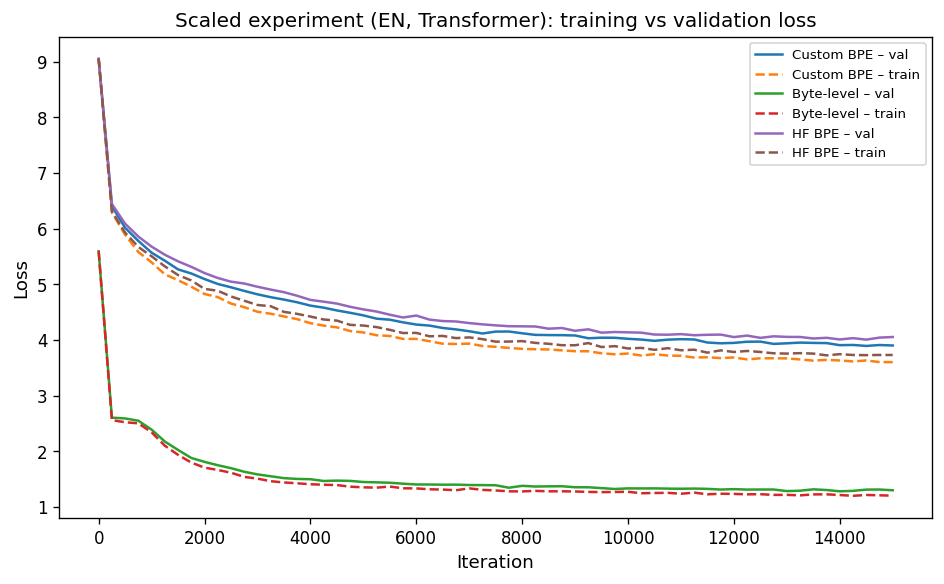

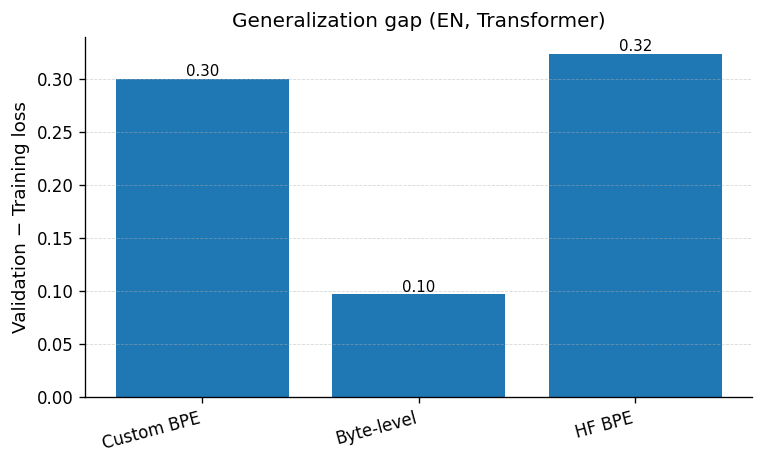

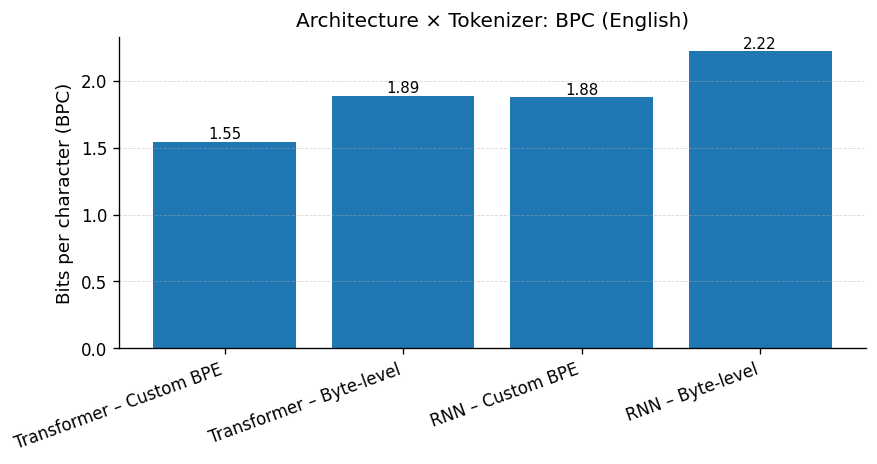

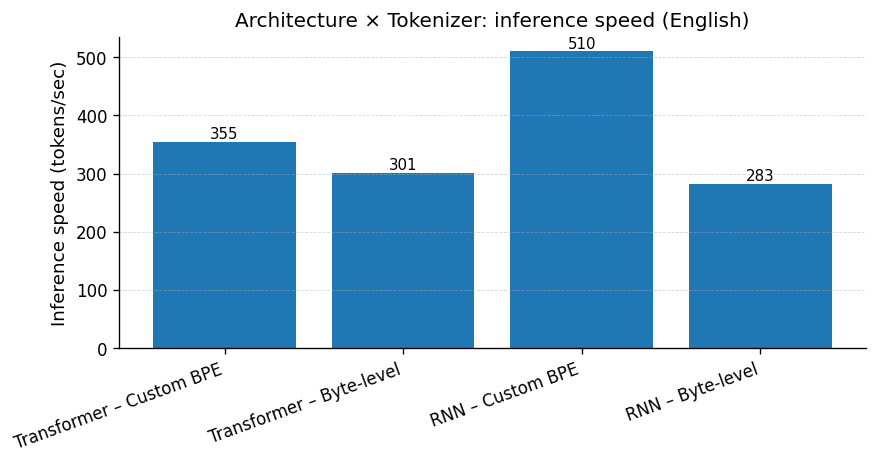

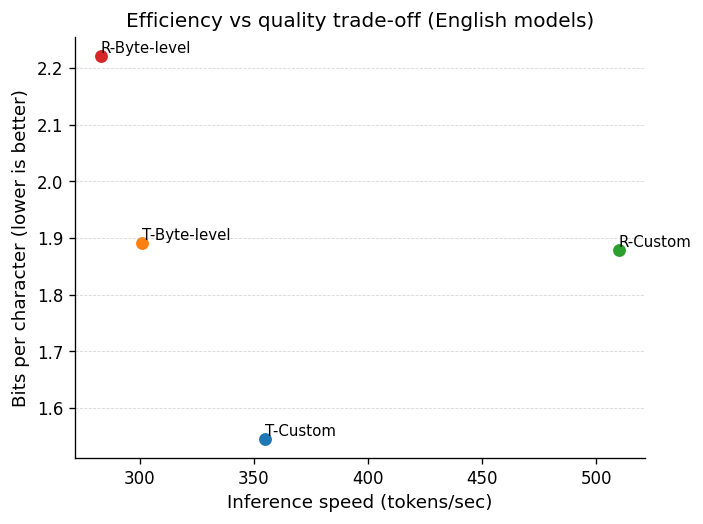

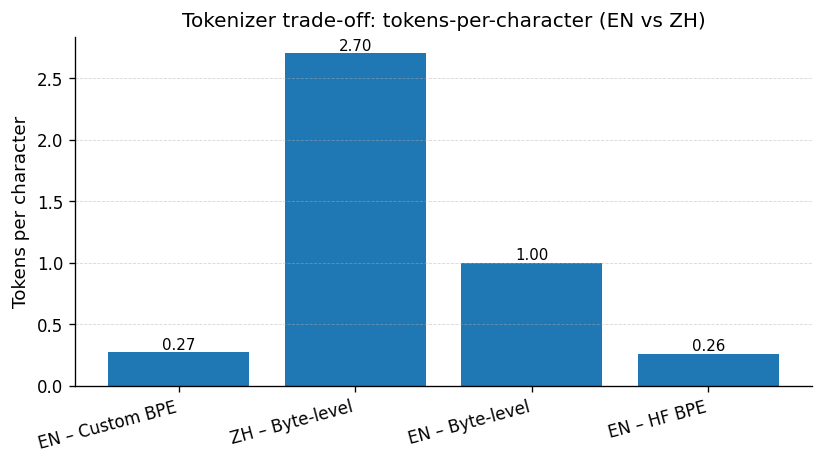

In [7]:
import os
import glob
import json
import numpy as np
import matplotlib.pyplot as plt

# -------------------------------------------------------------------
# Global styling
# -------------------------------------------------------------------
plt.style.use("default")  # you can try "seaborn-v0_8" if you like
plt.rcParams.update({
    "figure.dpi": 120,
    "font.size": 11,
    "axes.titlesize": 12,
    "axes.labelsize": 11,
    "xtick.labelsize": 10,
    "ytick.labelsize": 10,
    "legend.fontsize": 9,
})

RESULTS_DIR = "final jsons"

MODE_LABELS = {
    "byte": "Byte-level",
    "custom_bpe": "Custom BPE",
    "hf_bpe": "HF BPE",
}

ARCH_LABELS = {
    "transformer": "Transformer",
    "rnn": "RNN",
}

# -------------------------------------------------------------------
# Helpers
# -------------------------------------------------------------------

def beautify_axes(ax):
    """Minimalist, clean axes: light grid, no top/right spines."""
    ax.grid(True, axis="y", linestyle="--", linewidth=0.5, alpha=0.5)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)

def parse_name(fname):
    """
    final_en_transformer_custom_bpe.json
      -> lang="en", arch="transformer", mode_name="custom_bpe"
    """
    base = fname.replace("final_", "").replace(".json", "")
    parts = base.split("_")
    lang = parts[0]
    arch = parts[1]
    mode_name = "_".join(parts[2:])
    return lang, arch, mode_name

def load_results(results_dir=RESULTS_DIR):
    pattern = os.path.join(results_dir, "final_*.json")
    results = {}
    for path in glob.glob(pattern):
        with open(path, "r") as f:
            data = json.load(f)
        fname = os.path.basename(path)
        results[fname] = data
    return results

results = load_results()

# -------------------------------------------------------------------
# FIGURE 1: Training dynamics (EN, Transformer, all tokenizers)
# -------------------------------------------------------------------

def fig1_scaled_training_dynamics_en_transformer(results,
                                                 lang_filter="en",
                                                 arch_filter="transformer",
                                                 eval_every=250):
    plt.figure(figsize=(8, 5))

    for fname, data in results.items():
        lang, arch, mode_name = parse_name(fname)
        if lang != lang_filter or arch != arch_filter:
            continue

        train_losses = data["train_losses"]
        val_losses = data["val_losses"]
        steps = np.arange(len(val_losses)) * eval_every
        label = MODE_LABELS.get(mode_name, mode_name)

        # Validation: solid, Train: dashed
        plt.plot(steps, val_losses, label=f"{label} – val")
        plt.plot(steps, train_losses, linestyle="--",
                 label=f"{label} – train")

    plt.xlabel("Iteration")
    plt.ylabel("Loss")
    plt.title("Scaled experiment (EN, Transformer): training vs validation loss")
    plt.legend(fontsize=8)
    plt.tight_layout()
    plt.show()


# -------------------------------------------------------------------
# FIGURE 2: Generalization gap (EN, Transformer)
# -------------------------------------------------------------------

def fig2_generalization_gap_en_transformer(results,
                                           lang_filter="en",
                                           arch_filter="transformer"):
    labels = []
    gaps = []

    for fname, data in results.items():
        lang, arch, mode_name = parse_name(fname)
        if lang != lang_filter or arch != arch_filter:
            continue

        train_losses = data["train_losses"]
        val_losses = data["val_losses"]
        if not train_losses or not val_losses:
            continue

        gap = val_losses[-1] - train_losses[-1]
        label = MODE_LABELS.get(mode_name, mode_name)
        labels.append(label)
        gaps.append(gap)

    if not labels:
        print("No entries found for generalization gap plot.")
        return

    x = np.arange(len(labels))
    fig, ax = plt.subplots(figsize=(6.5, 4))
    bars = ax.bar(x, gaps)

    ax.set_xticks(x)
    ax.set_xticklabels(labels, rotation=15, ha="right")
    ax.set_ylabel("Validation − Training loss")
    ax.set_title("Generalization gap (EN, Transformer)")
    beautify_axes(ax)

    # value labels on top of bars
    for bar, val in zip(bars, gaps):
        ax.text(bar.get_x() + bar.get_width() / 2,
                bar.get_height(),
                f"{val:.2f}",
                ha="center", va="bottom", fontsize=9)

    fig.tight_layout()
    plt.show()

# -------------------------------------------------------------------
# FIGURE 3 & 4: Architecture × Tokenizer (Table 1)
# -------------------------------------------------------------------

def table1_rows():
    # Table 1 from your report (English)
    return [
        ("Transformer – Custom BPE", "Transformer", "Custom BPE", 1.5460, 355),
        ("Transformer – Byte-level", "Transformer", "Byte-level", 1.8913, 301),
        ("RNN – Custom BPE",        "RNN",         "Custom BPE", 1.8796, 510),
        ("RNN – Byte-level",        "RNN",         "Byte-level", 2.2217, 283),
    ]

def fig3_arch_tokenizer_bpc():
    rows = table1_rows()
    labels = [r[0] for r in rows]
    bpcs   = [r[3] for r in rows]

    x = np.arange(len(labels))
    fig, ax = plt.subplots(figsize=(7.5, 4))
    bars = ax.bar(x, bpcs)

    ax.set_xticks(x)
    ax.set_xticklabels(labels, rotation=20, ha="right")
    ax.set_ylabel("Bits per character (BPC)")
    ax.set_title("Architecture × Tokenizer: BPC (English)")
    beautify_axes(ax)

    for bar, val in zip(bars, bpcs):
        ax.text(bar.get_x() + bar.get_width() / 2,
                bar.get_height(),
                f"{val:.2f}",
                ha="center", va="bottom", fontsize=9)

    fig.tight_layout()
    plt.show()

def fig4_arch_tokenizer_speed():
    rows = table1_rows()
    labels = [r[0] for r in rows]
    speeds = [r[4] for r in rows]

    x = np.arange(len(labels))
    fig, ax = plt.subplots(figsize=(7.5, 4))
    bars = ax.bar(x, speeds)

    ax.set_xticks(x)
    ax.set_xticklabels(labels, rotation=20, ha="right")
    ax.set_ylabel("Inference speed (tokens/sec)")
    ax.set_title("Architecture × Tokenizer: inference speed (English)")
    beautify_axes(ax)

    for bar, val in zip(bars, speeds):
        ax.text(bar.get_x() + bar.get_width() / 2,
                bar.get_height(),
                f"{val:.0f}",
                ha="center", va="bottom", fontsize=9)

    fig.tight_layout()
    plt.show()

# -------------------------------------------------------------------
# FIGURE 5: BPC vs speed scatter (efficiency vs quality)
# -------------------------------------------------------------------

def fig5_bpc_vs_speed_scatter():
    rows = table1_rows()
    fig, ax = plt.subplots(figsize=(6, 4.5))

    for name, arch, tok, bpc, speed in rows:
        ax.scatter(speed, bpc, s=45)
        short = f"{arch[0]}-{tok.split()[0]}"  # e.g. "T-Custom"
        ax.text(speed, bpc, short, fontsize=9,
                ha="left", va="bottom")

    ax.set_xlabel("Inference speed (tokens/sec)")
    ax.set_ylabel("Bits per character (lower is better)")
    ax.set_title("Efficiency vs quality trade-off (English models)")
    beautify_axes(ax)
    fig.tight_layout()
    plt.show()

# -------------------------------------------------------------------
# FIGURE 6: Tokens per character (EN tokenizers + ZH byte-level)
# -------------------------------------------------------------------

def fig6_tokens_per_character(results):
    entries = []

    for fname, data in results.items():
        lang, arch, mode_name = parse_name(fname)

        # using Transformer as representative for each tokenizer
        if arch != "transformer":
            continue

        if lang == "en":
            label = f"EN – {MODE_LABELS.get(mode_name, mode_name)}"
            entries.append((label, data["tokens_per_char"]))
        elif lang == "zh" and mode_name == "byte":
            label = "ZH – Byte-level"
            entries.append((label, data["tokens_per_char"]))

    if not entries:
        print("No entries found for tokens_per_char plot.")
        return

    seen = {}
    for label, tpc in entries:
        seen[label] = tpc
    labels = list(seen.keys())
    tpcs   = [seen[l] for l in labels]

    x = np.arange(len(labels))
    fig, ax = plt.subplots(figsize=(7, 4))
    bars = ax.bar(x, tpcs)

    ax.set_xticks(x)
    ax.set_xticklabels(labels, rotation=15, ha="right")
    ax.set_ylabel("Tokens per character")
    ax.set_title("Tokenizer trade-off: tokens-per-character (EN vs ZH)")
    beautify_axes(ax)

    for bar, val in zip(bars, tpcs):
        ax.text(bar.get_x() + bar.get_width() / 2,
                bar.get_height(),
                f"{val:.2f}",
                ha="center", va="bottom", fontsize=9)

    fig.tight_layout()
    plt.show()

# -------------------------------------------------------------------
# Run all figures
# -------------------------------------------------------------------

if __name__ == "__main__":
    fig1_scaled_training_dynamics_en_transformer(results)
    fig2_generalization_gap_en_transformer(results)
    fig3_arch_tokenizer_bpc()
    fig4_arch_tokenizer_speed()
    fig5_bpc_vs_speed_scatter()
    fig6_tokens_per_character(results)
